# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=10))

{
          "data": {
                    "1": {
                              "id": 1,
                              "name": "Bitcoin",
                              "symbol": "BTC",
                              "website_slug": "bitcoin",
                              "rank": 1,
                              "circulating_supply": 18740231,
                              "total_supply": 18740231,
                              "max_supply": 21000000,
                              "quotes": {
                                        "USD": {
                                                  "price": 32312.0,
                                                  "volume_24h": 54431859140,
                                                  "market_cap": 602478993197,
                                                  "percentage_change_1h": 2.59926097937179,
                                                  "percentage_change_24h": -9.28457550043223,
                                              

In [6]:
# select the price of BTC
my_btc_value = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(my_btc_value)

40005.4872


In [7]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=10))

{
          "data": {
                    "1027": {
                              "id": 1027,
                              "name": "Ethereum",
                              "symbol": "ETH",
                              "website_slug": "ethereum",
                              "rank": 2,
                              "circulating_supply": 116388327,
                              "total_supply": 116388327,
                              "max_supply": 0,
                              "quotes": {
                                        "USD": {
                                                  "price": 1942.7,
                                                  "volume_24h": 41647793768,
                                                  "market_cap": 225334123687,
                                                  "percentage_change_1h": 3.17885884406371,
                                                  "percentage_change_24h": -13.2078150999449,
                                            

In [8]:
# select the ETH price
my_eth_value = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(my_eth_value)

2405.25687


In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40005.49
The current value of your 5.3 ETH is $2405.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stocks_today = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_stocks_today

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-06-18 00:00:00-04:00  115.05  115.39  114.91  115.29  5438261  417.08   

                                                              
                               high    low   close    volume  
time                                                          
2021-06-18 00:00:00-04:00  417.8281  414.7  415.01  92753385

In [13]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_stocks_today["AGG"]["close"])
spy_close_price = float(df_stocks_today["SPY"]["close"])

In [14]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.29
Current SPY closing price: $415.01


In [15]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20750.50
The current value of your 200 AGG shares is $23058.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
df_data = {
    "amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value],
}

tickers = ["crypto", "shares"]

df_savings = pd.DataFrame(df_data, index=tickers)


# Create savings DataFrame
#df_savings["Total Crypto Value"] = my_btc_value + my_eth_value
#df_savings["Total Shares Value"] = my_agg_value + my_spy_value

# Display savings DataFrame
display(df_savings)

,amount
crypto,42410.74407
shares,43808.50000


<AxesSubplot:title={'center':'Total Worth Pie Chart'}, ylabel='amount'>

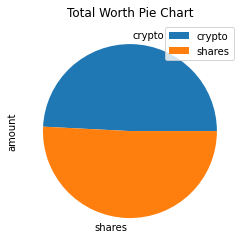

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Total Worth Pie Chart")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
total_savings = df_savings.sum()

# Calculate total amount of savings
if total_savings > emergency_fund:
    print("Congrats, my friend. You have enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congrats, my friend. You have reach your finacial goal!")
elif total_savings < emergency_fund:
    print("Keep saving! You are ${emeregency_fund - total_saving}away from your goal!")
#
# Validate saving health
# YOUR CODE HERE!

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
total_savings > emergency_fund

amount    True
dtype: bool

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")